# 2 Year EDM

In [75]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks')
sns.set_context(context='notebook',font_scale=1.3)
%matplotlib inline
import pandas as pd
import sqlite3 as sq
import scipy as sp
import sklearn as sk
#f = '/Users/jeffreychapple/Documents/myskedmproject/skedm-master/skedm'
#sys.path.append(f)

In [76]:
import skedm as edm
import buoypy.buoypy as bp

In [77]:
buoy =41110
year = np.NAN
year_range = (2014,2016)

H = bp.historic_data(41110,year,year_range)

In [78]:
X = H.get_all_stand_meteo()

Jan2016 not in records
http://www.ndbc.noaa.gov/view_text_file.php?filename=4111012016.txt.gz&dir=data/stdmet/Jan/
Feb2016 not in records
http://www.ndbc.noaa.gov/view_text_file.php?filename=4111022016.txt.gz&dir=data/stdmet/Feb/
Mar2016 not in records
http://www.ndbc.noaa.gov/view_text_file.php?filename=4111032016.txt.gz&dir=data/stdmet/Mar/
Apr2016 not in records
http://www.ndbc.noaa.gov/view_text_file.php?filename=4111042016.txt.gz&dir=data/stdmet/Apr/
May2016 not in records
http://www.ndbc.noaa.gov/view_text_file.php?filename=4111052016.txt.gz&dir=data/stdmet/May/
Jun2016 not in records
http://www.ndbc.noaa.gov/view_text_file.php?filename=4111062016.txt.gz&dir=data/stdmet/Jun/
Jul2016 not in records
http://www.ndbc.noaa.gov/view_text_file.php?filename=4111072016.txt.gz&dir=data/stdmet/Jul/
Aug2016 not in records
http://www.ndbc.noaa.gov/view_text_file.php?filename=4111082016.txt.gz&dir=data/stdmet/Aug/
Sep2016 not in records
http://www.ndbc.noaa.gov/view_text_file.php?filename=4111

In [79]:
X.head()

,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
2014-03-14 17:40:00,NaN,NaN,NaN,0.53,9.88,5.98,96.0,NaN,NaN,10.5,NaN,NaN,NaN
2014-03-14 18:10:00,NaN,NaN,NaN,0.54,9.88,5.91,NaN,NaN,NaN,10.6,NaN,NaN,NaN
2014-03-14 18:40:00,NaN,NaN,NaN,0.53,10.53,5.85,102.0,NaN,NaN,10.7,NaN,NaN,NaN
2014-03-14 19:10:00,NaN,NaN,NaN,0.55,9.88,6.04,95.0,NaN,NaN,10.8,NaN,NaN,NaN
2014-03-14 19:40:00,NaN,NaN,NaN,0.57,10.53,6.29,NaN,NaN,NaN,10.7,NaN,NaN,NaN


In [80]:
X.tail()

,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
2016-12-31 21:59:00,NaN,NaN,NaN,0.48,5.26,4.70,170.0,NaN,NaN,13.4,NaN,NaN,NaN
2016-12-31 22:29:00,NaN,NaN,NaN,0.50,8.33,4.71,109.0,NaN,NaN,13.4,NaN,NaN,NaN
2016-12-31 22:59:00,NaN,NaN,NaN,0.54,5.56,4.28,165.0,NaN,NaN,13.4,NaN,NaN,NaN
2016-12-31 23:29:00,NaN,NaN,NaN,0.57,5.26,4.17,172.0,NaN,NaN,13.5,NaN,NaN,NaN
2016-12-31 23:59:00,NaN,NaN,NaN,0.62,4.17,4.13,172.0,NaN,NaN,13.4,NaN,NaN,NaN


In [81]:
w = pd.DataFrame(X.WVHT) #extracting jut the wave height
p = pd.DataFrame(X.DPD)  #extracting just the period
wd = pd.DataFrame(X.MWD) #extracting just wind direction
ap = pd.DataFrame(X.APD) #"              "average period
wt = pd.DataFrame(X.WTMP) #"              "water temp

len(w), len(p), len(wd), len(ap), len(wt)


(44746, 44746, 44746, 44746, 44746)

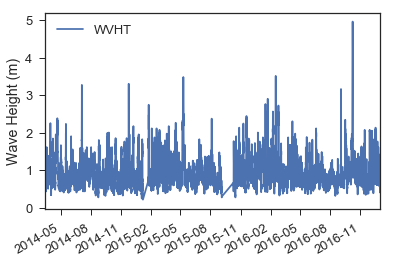

In [82]:
w.plot()
plt.ylabel('Wave Height (m)')


In [83]:
ww = w.resample('D').mean() #resampled the data-> daily avg

In [84]:
ww.head()

,WVHT
2014-03-14,0.552308
2014-03-15,0.783542
2014-03-16,0.592083
2014-03-17,1.348542
2014-03-18,1.414043


In [85]:
ww_array = ww.values.astype(float)
ww_array.shape #note the data has been resampled into daily average
WH = ww_array[:,0]
WH.shape

(1024,)

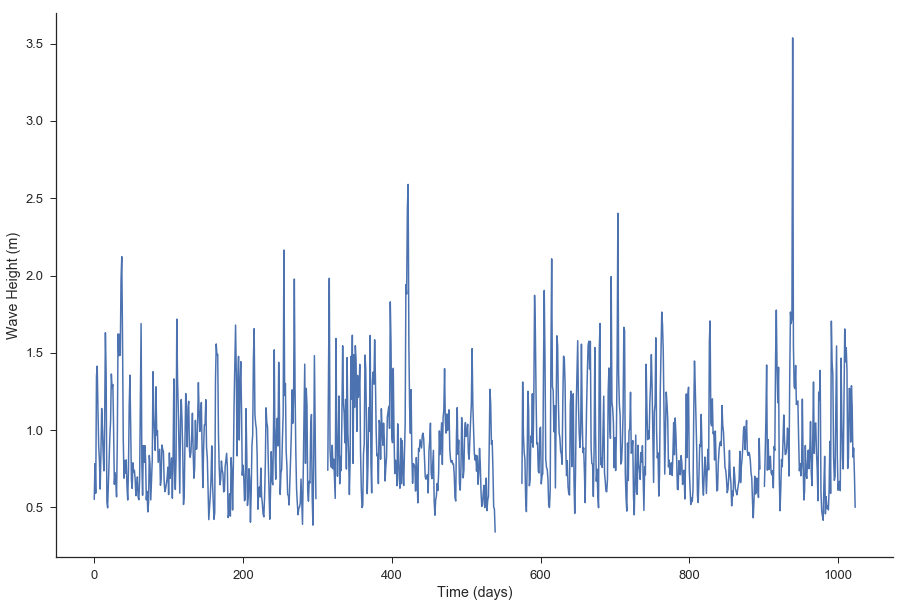

In [86]:
fig,ax = plt.subplots(figsize=(15,10))
ax.plot(WH,linewidth=1.5)
ax.set_xlabel('Time (days)')
ax.set_ylabel('Wave Height (m)')
sns.despine()

# Mutual Information

In [87]:
E = edm.Embed(WH) #initiate the embed class
E

In [88]:
max_lag = 50
mi = E.mutual_information(max_lag)

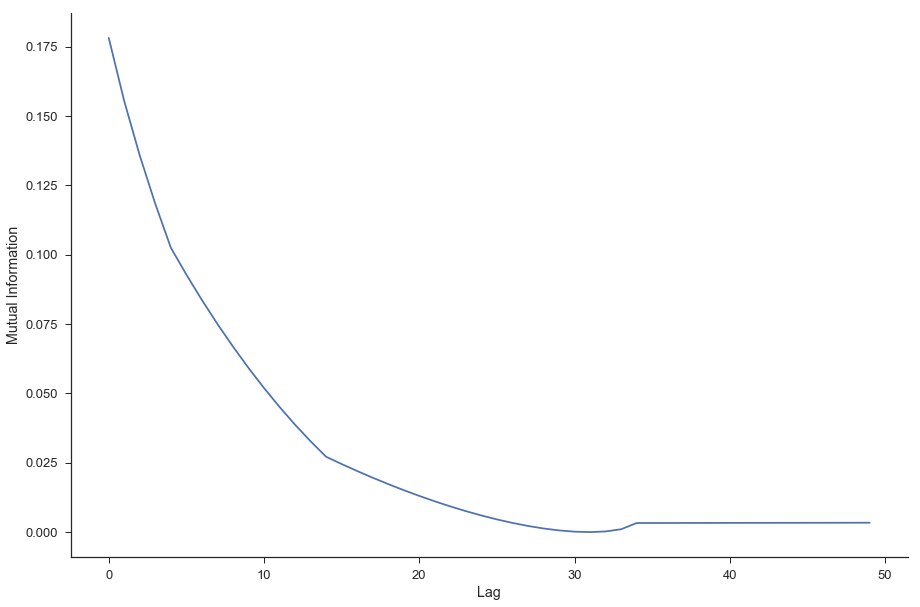

In [89]:
fig,ax=plt.subplots(figsize=(15,10))
ax.plot(mi)
#ax.plot(mi2)
ax.set_xlabel('Lag')
ax.set_ylabel('Mutual Information')
sns.despine()

In [65]:
np.argmin(mi)

31

# Embed the TS 

In [66]:
lag = 2
embed = 2 #this is the important value embed dimension is = lag(shifts in LR)
predict = 4 #predicting out to double the lag
WH,y = E.embed_vectors_1d(lag,embed,predict)

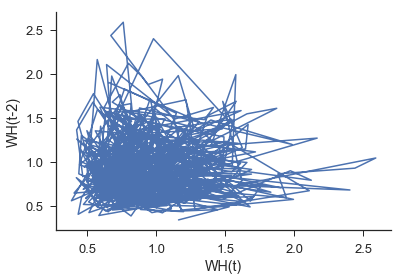

In [67]:
fig,ax = plt.subplots()
ax.plot(WH[:,0],WH[:,1],linewidth=1.5)
ax.set_xlabel('WH(t)')
ax.set_ylabel('WH(t-2)')
sns.despine()


# Train on first 75% of TS

In [68]:
#split it into training and testing sets
train_len = int(.75*len(WH))
Xtrain = WH[0:train_len]
ytrain = y[0:train_len]
Xtest = WH[train_len:]
ytest = y[train_len:]

Xtrain.shape,ytrain.shape,Xtest.shape,ytest.shape

((678, 3), (678, 60), (226, 3), (226, 60))

In [69]:
#Xtrain = Xtrain[~np.isnan(Xtrain)]

In [70]:
#Xtrain.size

In [71]:
#ytrain = ytrain[~np.isnan(ytrain)]
#ytrain.size

In [73]:
weights = 'distance' #use a distance weighting for the near neighbors
M = edm.Regression(weights) # initiate the nonlinear forecasting class

In [74]:
M.fit(Xtrain,ytrain) #fit the training data

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').